In [197]:
# Import Libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

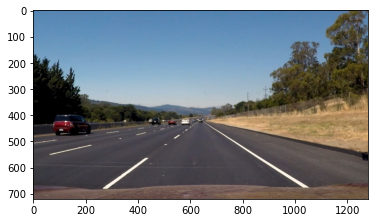

In [198]:
image_c=cv2.imread('Test_image.jpg')
image_c=cv2.cvtColor(image_c,cv2.COLOR_BGR2RGB)
plt.imshow(image_c)

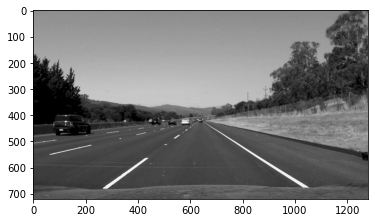

In [162]:
# Covert Image to grayscale
image_g=cv2.cvtColor(image_c,cv2.COLOR_BGR2GRAY)
plt.imshow(image_g,cmap='gray')

In [163]:
image_g.shape

(720, 1280)

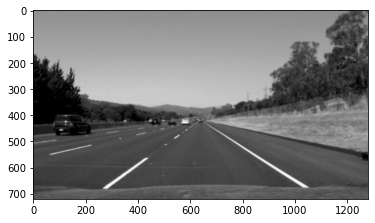

In [164]:
# Apply Gaussian Blur Filter
image_blurred=cv2.GaussianBlur(image_g,(7,7),0)
plt.imshow(image_blurred,cmap='gray')

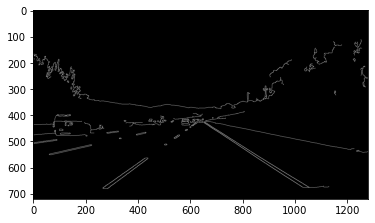

In [165]:
# Apply Canny Edge Detection
image_canny=cv2.Canny(image_blurred,10,200)
plt.imshow(image_canny,cmap='gray')

In [377]:
# Define Region of interest
vertices=np.array([[(200,700),(500,440),(750,440),(1200,700)]],dtype=np.int32)

In [378]:
vertices.dtype

dtype('int32')

In [379]:
mask=np.zeros_like(image_g)

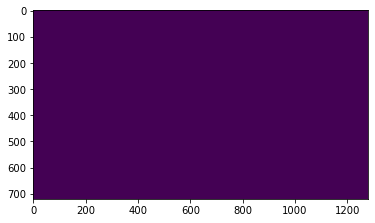

In [380]:
plt.imshow(mask)

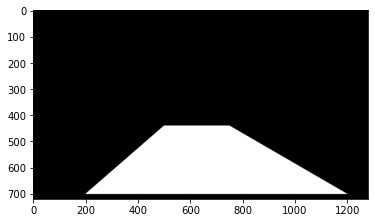

In [381]:
cv2.fillPoly(mask,vertices,255)
plt.imshow(mask,cmap='gray')

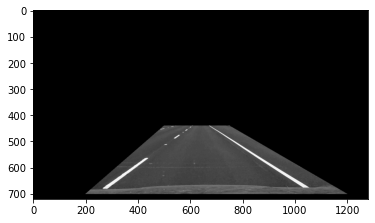

In [382]:
masked_image=cv2.bitwise_and(image_g,mask)
plt.imshow(masked_image,cmap='gray')

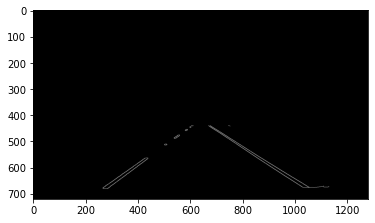

In [383]:
masked_image=cv2.bitwise_and(image_canny,mask)
plt.imshow(masked_image,cmap='gray')

In [384]:
masked_image.shape

(720, 1280)

In [399]:
# Hough line detection and draw function
lines = cv2.HoughLinesP(
    masked_image,
    rho=2,              #Distance resolution in pixels
    theta=np.pi / 180,  #Angle resolution in radians
    threshold=20,      #Min. number of intersecting points to detect a line  
    lines=np.array([]), #Vector to return start and end points of the lines indicated by [x1, y1, x2, y2] 
    minLineLength=100,   #Line segments shorter than this are rejected
    maxLineGap=100       #Max gap allowed between points on the same line
)

In [400]:
line_image=np.zeros((masked_image.shape[0],masked_image.shape[1],3),dtype=np.uint8)

In [401]:
for line in lines: 
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), [255,0,0], 20) 

In [402]:
lines

array([[[ 675,  444, 1031,  675]],

       [[ 677,  441, 1053,  676]],

       [[ 266,  677,  605,  440]],

       [[ 676,  440, 1050,  673]],

       [[ 281,  680,  611,  440]],

       [[ 279,  680,  396,  598]],

       [[ 270,  674,  540,  485]],

       [[ 436,  563,  586,  454]],

       [[ 383,  607,  599,  445]],

       [[ 434,  563,  608,  441]]], dtype=int32)

In [403]:
# Resultant weighted image
alpha=1
beta=1
gamma=0

In [404]:
Images_with_lines=cv2.addWeighted(image_c,alpha,line_image,beta,gamma)

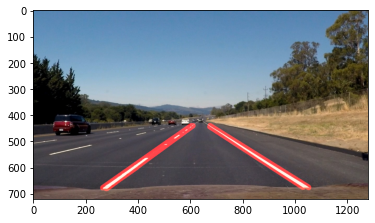

In [405]:
plt.imshow(Images_with_lines)